In [1]:
from plot_classes import *
from matplotlib import transforms

In [2]:
# create boost histogram

v1 = np.random.normal(size=(2, 100_000), scale=0.35)
hist = bh.Histogram(
    bh.axis.Regular(20, -1, 1, metadata='x'),
    bh.axis.Regular(20, -.5, .5, metadata='y')
)
hist.fill(*v1)
# pd.DataFrame(hist.to_numpy()[0])
# print(hist.view())
# list(hist.axes.edges[0])


Histogram(
  Regular(20, -1, 1, metadata='x'),
  Regular(20, -0.5, 0.5, metadata='y'),
  storage=Double()) # Sum: 84379.0 (100000.0 with flow)

In [3]:
# class ProjectionPlot(EmptyPlot):
    
    
#     def __init__(self, obj, **kwargs):
        
#         super().__init__(layout=(4,2), **kwargs)
#         self.hist = obj
#         self.set_color() # set default colormap
        
#         # default attributes
#         self.spacing = 0.12
#         self.stretch = 4.
#         self.need_grid = False
#         self.cbar_space = '10%'
#         self.cbar_size = '5%'
#         self.xtitles_dict['xcbar'] = ''
        
#         self.store_data(self.hist)
    
        
#     def store_data(self, obj):
#         """ Retrieve x and y data from obj """
        
#         self.pd_data = pd.DataFrame(obj.to_numpy()[0])
#         self.xsum = self.pd_data.sum(axis=0).to_list()
#         self.ysum = self.pd_data.sum(axis=1).to_list()
#         self.edges = [x for [x] in [list(obj.axes.edges[0][i]) for i in range(len(obj.axes.edges[0]))]]
        
    
#     def side_plots(self):
#         """ Make vertical and horizontal plots """
        
#         # horizontal plot
#         hep.histplot(
#             self.xsum, 
#             bins=self.edges, 
#             ax=self.h_ax, 
#             color='k', 
#             zorder=3
#         )
#         self.set_h_ax()

#         # adjust ticks
#         self.h_ax.ticklabel_format(style='plain')
#         for ytick in self.h_ax.yaxis.get_major_ticks():
#             ytick.label.set_fontsize(self.rcps['font.size'])
        
#         # vertical plot
#         hep.histplot(
#             self.ysum, 
#             bins=self.edges, 
#             ax=self.v_ax, 
#             color='k', 
#             zorder=3, 
#             orientation='horizontal'
#         )
#         self.set_v_ax()

#         # adjust ticks
#         self.v_ax.ticklabel_format(style='plain')
#         for xtick in self.v_ax.xaxis.get_major_ticks():
#             xtick.label.set_fontsize(self.rcps['font.size'])
        
#         # put grid on both subplots if needed
#         if self.need_grid:
#             self.h_ax.grid(linestyle=self.gridline, alpha=0.3, color='k', axis='x')
#             self.h_ax.grid(linestyle=self.gridline, alpha=0.3, color='k', axis='y', which='minor')
#             self.v_ax.grid(linestyle=self.gridline, alpha=0.3, color='k', axis='y')
#             self.v_ax.grid(linestyle=self.gridline, alpha=0.3, color='k', axis='x', which='minor')
#             self.h_ax.set_axisbelow(True)
#             self.v_ax.set_axisbelow(True)
        
        
#     def main_plot(self):
#         """ Main plot function """
        
#         hep.hist2dplot(self.hist, ax=self.main_ax, cbar=False)#True, cbarpad=self.cbar_space, cbarpos = 'right', cbarsize = self.cbar_size)
        
#         # main plot
#         _range = np.arange(self.edges[0], self.edges[-1]+0.5, 0.5)
#         label_list = [f'{x:.1f}' for x in _range]
        
#         # x axis
#         self.main_ax.set_xticks(_range)
#         self.main_ax.set_xticklabels(label_list, fontsize=self.rcps['font.size'])
        
#         # y axis
#         self.main_ax.set_yticks(_range)
#         self.main_ax.set_yticklabels(label_list, fontsize=self.rcps['font.size'])
        
#         # set title
#         self.fig.suptitle(self.mastertitle, fontsize=self.rcps['axes.titlesize'])
        
#         # set x and y axis labels
#         self.set_xtitles(self.main_ax, 'xmain', self.fontsize, loc=self.rcps['xaxis.labellocation'])
#         self.set_ytitles(self.main_ax, 'ymain', self.fontsize, loc=self.rcps['yaxis.labellocation'])
#         self.set_xtitles(self.v_ax, 'xright', self.fontsize, loc=self.rcps['xaxis.labellocation'])
#         self.set_ytitles(self.h_ax, 'ytop', self.fontsize, loc=self.rcps['yaxis.labellocation'])
        
#         # put atlas logo
#         hep.atlas.text(self.logotext, ax=self.h_ax, loc=0)

#         #plot colour bar
#         im = self.main_ax.imshow(self.hist, cmap=mpl.cm.get_cmap(self.user_cmap))
#         self.cax.tick_params(axis='y', which='both', length=5, labelsize=10)
#         cbar = self.fig.colorbar(im,cax=self.cax, orientation="horizontal", shrink=0.6)
#         self.cax.ticklabel_format(style='plain')
#         cbar.ax.tick_params(labelsize=10, which='both')
#         cbar.set_label(self.xtitles_dict['xcbar'], loc='center', fontsize = self.rcps['font.size'])

        
#     def set_h_ax(self, **hax_kw):
#         """ Horizonthal subplot """
        
#         self.hax_kw = {
#             'axis'       :'x',
#             'labelbottom': False,
#             'labelsize'  : 5
#         }
#         self.hax_kw.update(hax_kw)
                
#         #self.h_ax.set_xlim(-1, 1)
#         self.h_ax.tick_params(**self.hax_kw)
        
        
#     def set_v_ax(self, **vax_kw):
#         """ Vertical subplot """
        
#         self.vax_kw = {
#             'axis'     :'y',
#             'labelleft': False,
#             'labelsize': 5
#         }
#         self.vax_kw.update(vax_kw)
                
#         # self.v_ax.set_ylim(-1, 1)
#         self.v_ax.tick_params(**self.vax_kw)

    
#     def figure_options(self, spacing=None, stretch=None, cbarsize=None,cbarspace=None, **figkw):
        
#         super().figure_options(**figkw)
        
#         if spacing is not None:
#             self.spacing = spacing
#         if stretch is not None:
#             self.stretch = stretch
#         if cbarsize is not None:
#             self.cbar_size = cbarsize
#         if cbarspace is not None:
#             self.cbar_space = cbarspace    
    
#     def plot_options(self, gridstring='', rcp_kw={}):
                        
#         # update rcp dictionary if passed
#         self.rcps.update({k: v for k, v in rcp_kw.items() if k in mpl.rcParams})
#         self.config_rcParams(self.rcps)

#         # grid options
#         if gridstring:
#             self.gridstring_converter(gridstring)
#             self.need_grid = True
    
    
#     def color_options(self, colormap=None, reverse=False):
        
#         self.set_color(colormap, reverse)

        
#     def create(self, save_name='', dpi=1000):
        
#         # create plot figure and subplots
#         self.create_canvas()

#         cbarsize = float(self.cbar_size.strip('%'))/100.
#         cbarspace = float(self.cbar_space.strip('%'))/100.
#         #cbarwidth = self.stretch/(1.-cbarsize-cbarspace)-self.stretch #in case of cbar=True in hist2dplot

#         self.make_grid(
#             hspace=self.spacing, 
#             wspace=self.spacing, 
#             height_ratios=[1, self.stretch, self.stretch*cbarspace, self.stretch*cbarsize], 
#             width_ratios=[self.stretch, 1]
#         )
#         self.h_ax = self.make_subplot(0, 1, 0, 1) # horizonthal subplot
#         self.v_ax = self.make_subplot(1, 2, 1, 2) # vertical subplot
#         self.main_ax = self.make_subplot(1, 2, 0, 1) # main subplot
#         self.cax = self.make_subplot(3, 4, 0, 1) # colorbar


#         # make plot
#         self.side_plots()
#         self.main_plot()

        
#         if save_name:
#             self.saveimage(save_name, dpi)
            


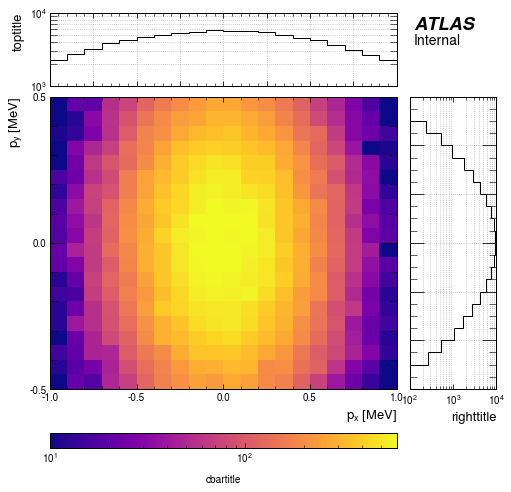

In [4]:
# my_dict={
#     'axes.titlesize': 20,
#     'xaxis.labellocation': 'center',
#     'yaxis.labellocation': 'center',
# }

plot = ProjectionPlot(hist)
plot.figure_options(figsize=(8,8), )#spacing=0.12, cbar_size='5%',cbar_space='10%')
plot.plot_options('both:', log=True, vmin=10, vmax = 600)
plot.set_axislabels(13, ymain=r'$p_y$ [MeV]', xmain=r'$p_x$ [MeV]', xright='righttitle', ytop='toptitle',xcbar='cbartitle')
plot.color_options(colormap='plasma')
plot.create()
#plot.saveimage("ProjectionPlot_demo_binary", 1000)